TASK 1

In [1]:
import numpy as np

In [ ]:
def init_q_table(n_states, n_actions):
    return np.zeros(shape=(n_states,n_actions))

In [ ]:
def q_update(Q, s, a, r, s_next, α, γ):
    
    max_q_next = Q[s_next][0]
    for q in Q[s_next]:
        if q > max_q_next:
            max_q_next = q

    Q[s][a] = Q[s][a] + α*(r + γ*max_q_next - Q[s][a])
    return Q

TASK 2

In [18]:
# Define a simple GridWorld environment. For example, a 4x4 grid with specified terminal states, reward structure, and action space (up/down/left/right).

grid = np.array([
    [-1, -1, -1, -1],
    [-1, -1, -1, -1],
    [-1, -1, -1, -1],
    [-1, -1, -100, 100]
])

# Terminal state 10

actions = [(0,1), (1,0), (-1, 0), (0, -1)]

In [5]:
def select_action_index(Q, s, e):

    actions = [(0,1), (1,0), (-1, 0), (0, -1)]

    current_position = (s/4, s%4)

    possible_actions = []
    for i in range(4):
        if ( (0 <= current_position[0] + actions[i][0] < 4)  and (0 <= current_position[1] + actions[i][1] < 4)):
            possible_actions.append(i)

    selected = np.random.choice(["A", "B"], p=[e, 1 - e])

    if selected == "A":
        selected_action_index = possible_actions[np.random.randint(0, len(possible_actions))]
    elif selected == "B":
        max_q_value_action = Q[s][possible_actions[0]]
        selected_action_index = possible_actions[0]
        for i in possible_actions:
            if max_q_value_action < Q[s][i]:
                selected_action_index = i
                
    return selected_action_index

In [6]:
def new_state(s, action):
    new_s = s + 4*action[0] + action[1]
    return new_s

In [ ]:
def main(e):

    q_table = init_q_table(16, 4)
    rewards = []

    γ = 0.1
    α = 0.1

    for episode in range(500):

        curr_state = 0
        reward = 0

        while(True):
            action_index = select_action_index(q_table, curr_state, e)
            action = actions[action_index]
            next_state = new_state(curr_state, action)

            # curr_posn = (next_state/4, next_state%4)
            r = grid[int(next_state/4)][next_state%4]

            reward += r

            # r = 1
            # print(curr_state/4)
            q_table = q_update(q_table, curr_state, action_index, r, next_state, α, γ)

            if (next_state) == 15:
                rewards.append(reward)
                break

            curr_state = next_state
            
    return rewards


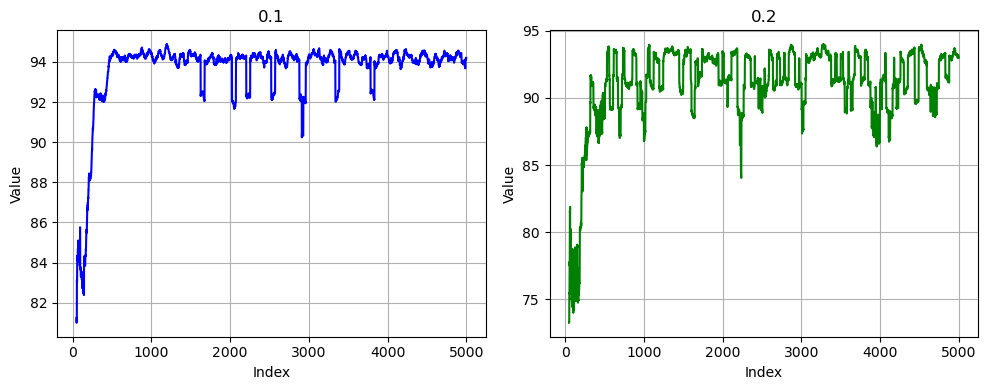

In [28]:
import pandas as pd

array1 = main(0.1)
array2 = main(0.2)

array1 = pd.DataFrame(array1)
array2 = pd.DataFrame(array2)

array1 = array1.rolling(window=50).mean()
array2 = array2.rolling(window=50).mean()


import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].plot(array1, color='blue')
axs[0].set_title('0.1')
axs[0].set_xlabel('Index')
axs[0].set_ylabel('Value')
axs[0].grid(True)

axs[1].plot(array2, color='green')
axs[1].set_title('0.2')
axs[1].set_xlabel('Index')
axs[1].set_ylabel('Value')
axs[1].grid(True)

plt.tight_layout()
plt.show()


Explanation for the above graphs

For 0.2 it tries more exploring so error even after training the model, less value is achieved as compared to 0.1 which prefers the more correct paths.